Część 1:

Analiza zmian zjawisk w czasie porządkuje informacje i pozwala na wyciągnięcie bardziej szczegółowych wniosków, np. trendów ze składowymi okresowymi.

Trend to tendencja rozwojowa, która wskazuje ogólny kierunek rozwoju zjawiska. Rozwój zjawiska rozumiany jest jako systematyczne zmiany, jakim podlega to zjawisko. Rozróżniany jest m.in. trend liniowy i nieliniowy.

Składowe okresowe to regularne odchylenia od trendu. Wahania cykliczne charakteryzują się długookresowymi, rytmicznymi odchyleniami. Wahania sezonowe są krótkookresowe i odzwierciedlają wpływ zachowań wynikający z kalendarza. 

Wyznacz średnią kroczącą i odchylenie standardowe kroczące (np. 7-dniowe), aby zobaczyć, jak te zjawiska zmieniają się w czasie. Obliczenia wykonaj dla:

1.1. liczby nowych zachorowań,

1.2. liczby nowych śmierci,

1.3. liczby nowych szczepień,

1.4. 2 innych różnych informacji, które uznasz za istotne.

Możesz przefiltrować dane, jeżeli uznasz to za potrzebne. Sprawdź, czy dla tych informacji można zaobserwować trendy (np. sezonowe wzorce lub cykle) i wahania. Przeanalizuj otrzymane wyniki. 

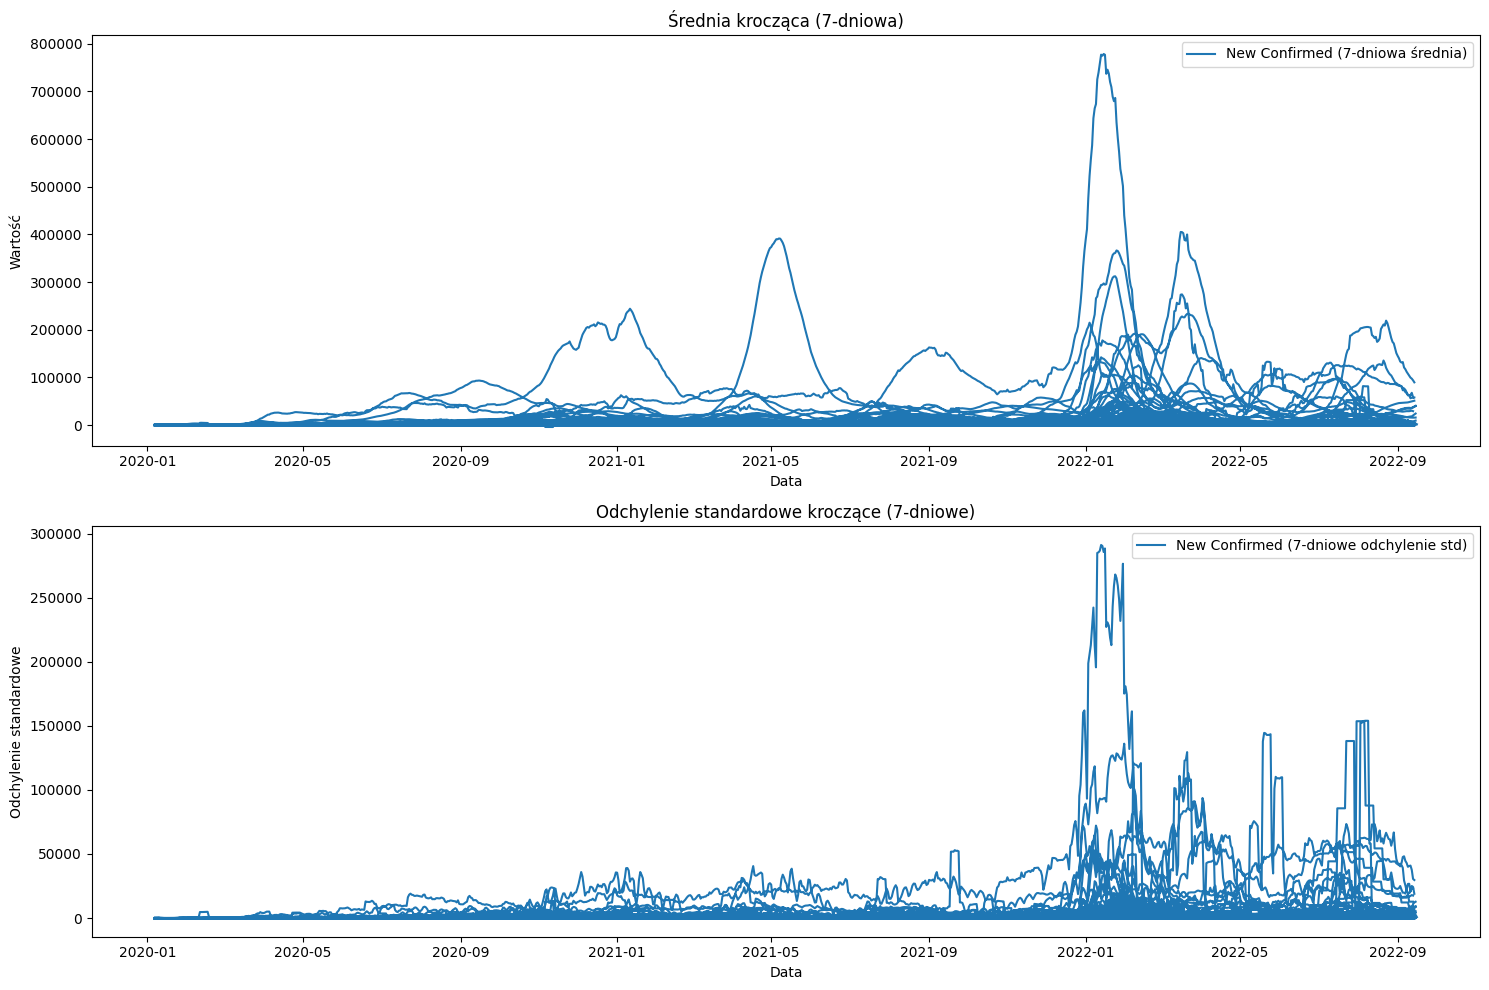

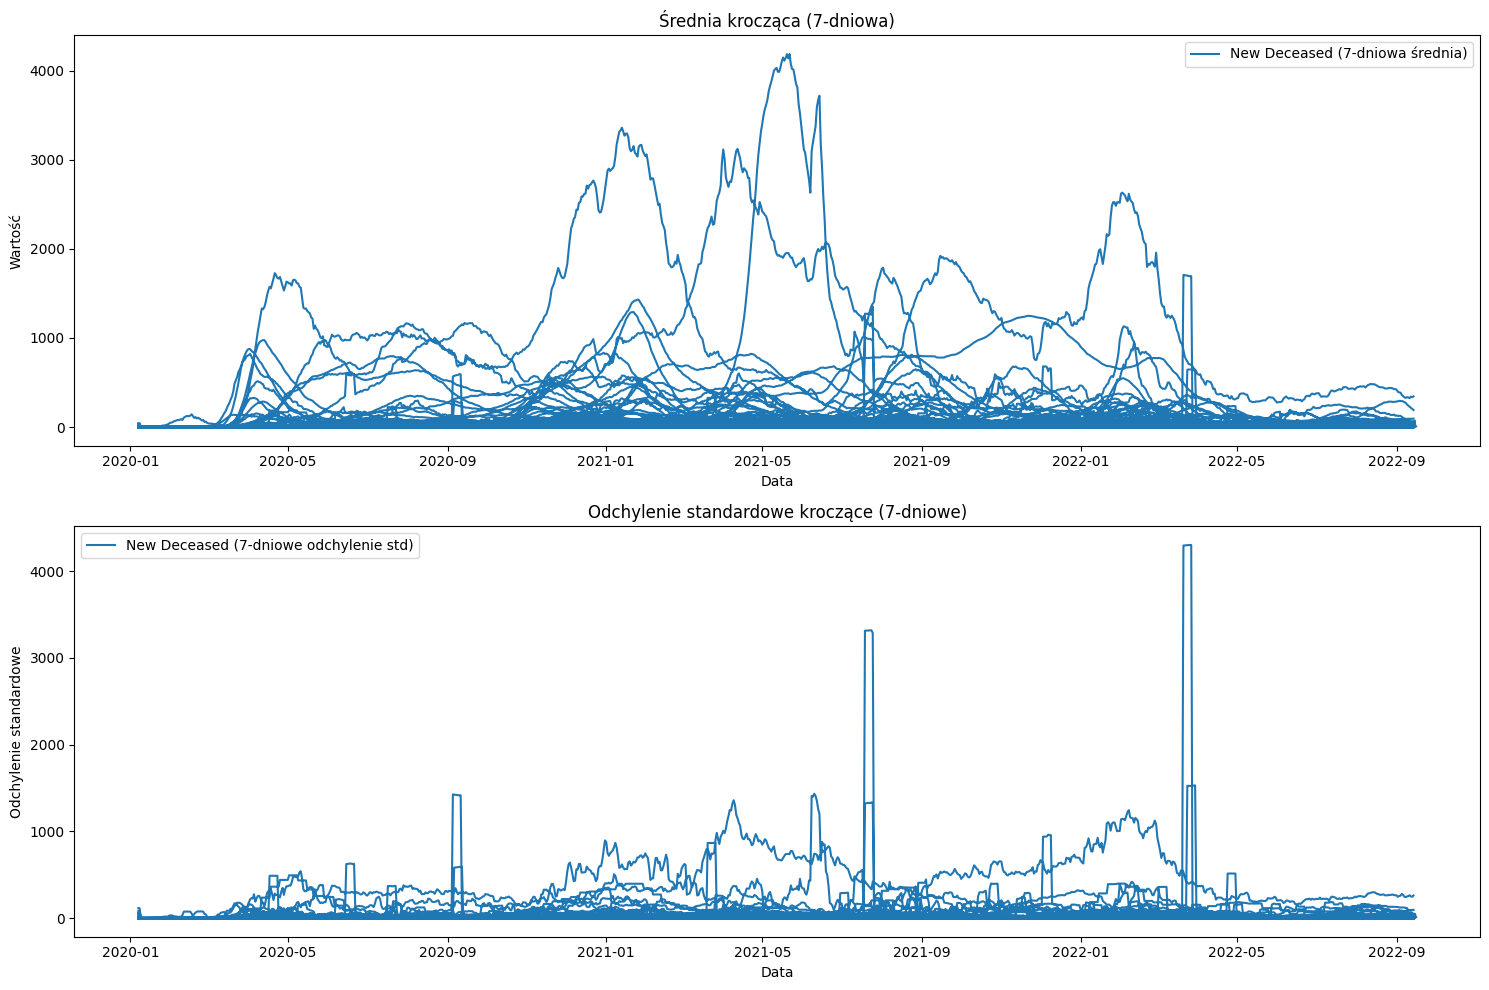

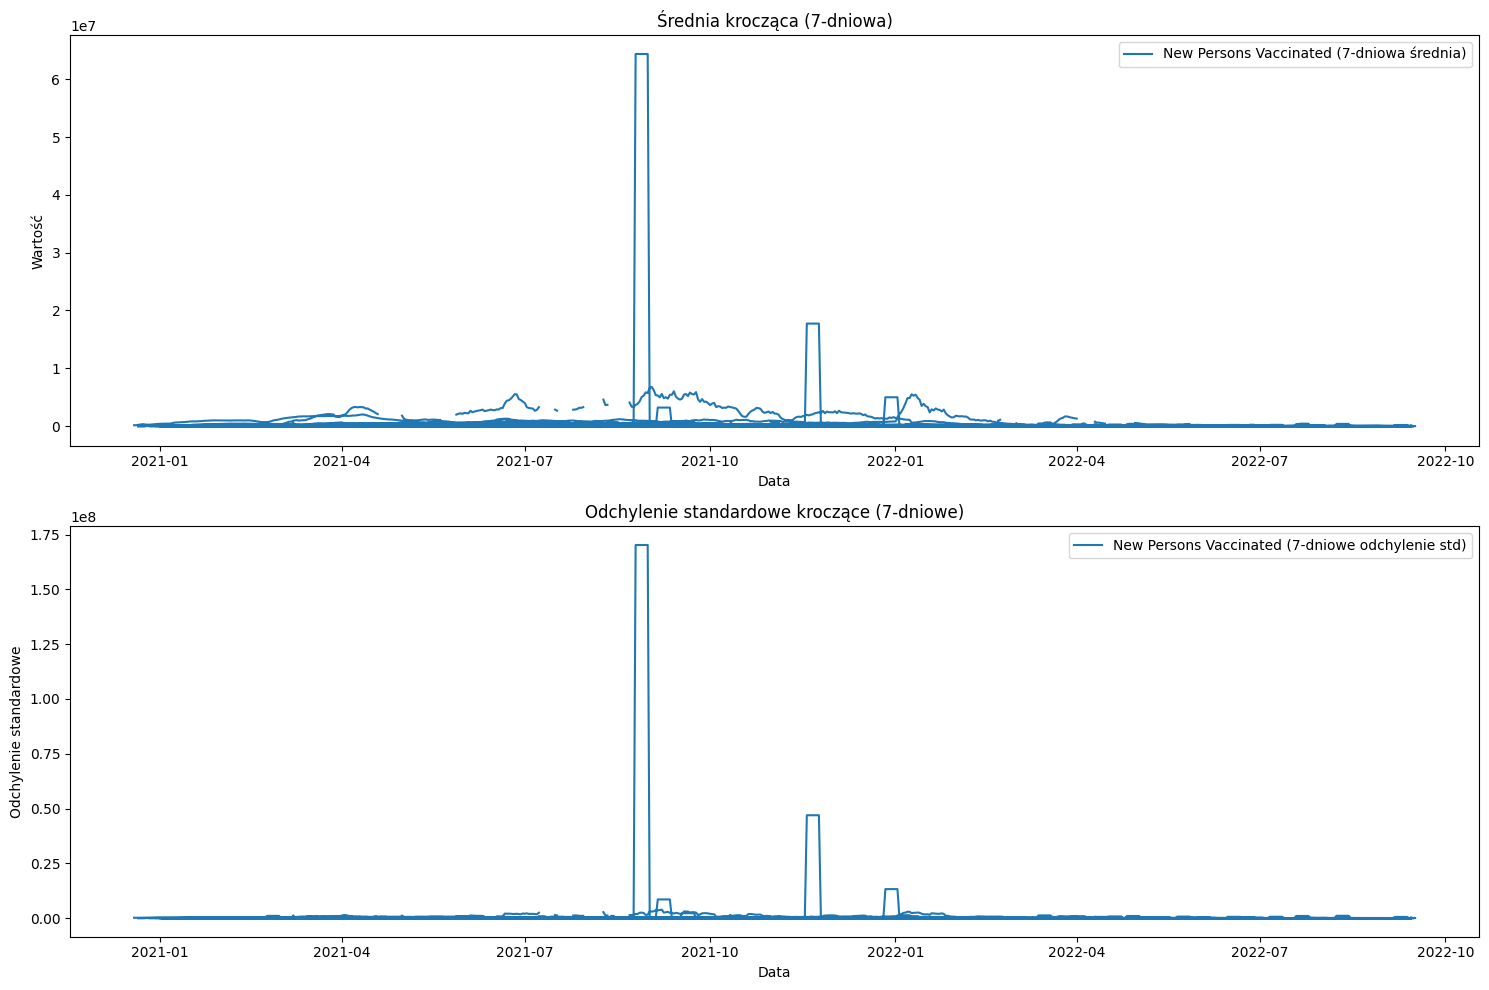

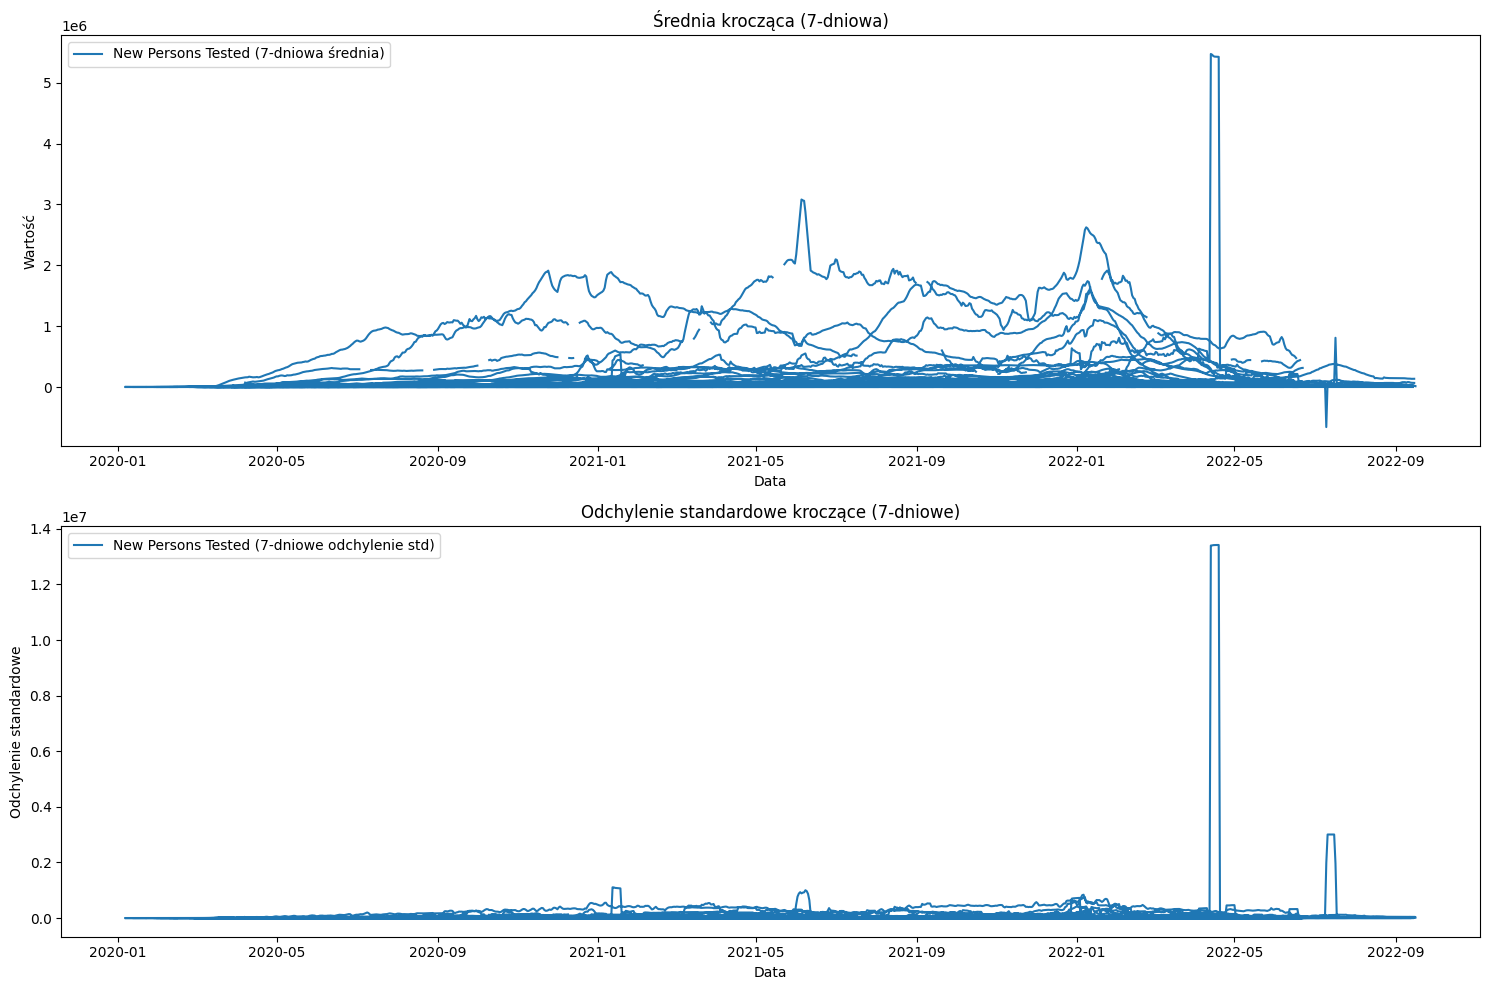

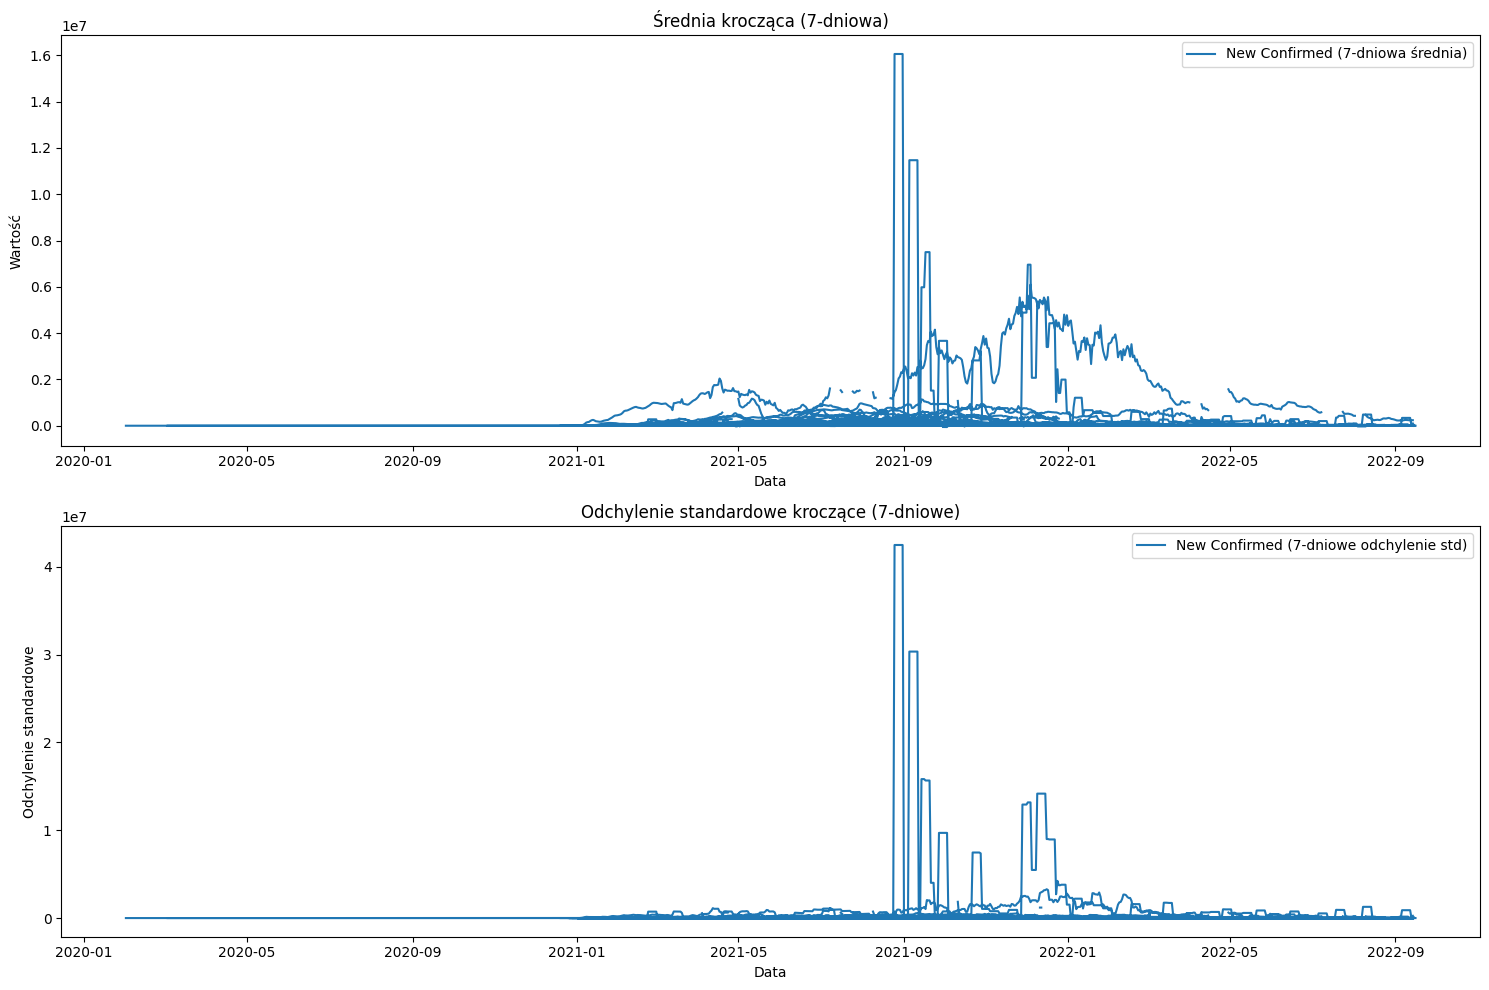

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

merged_covid_df = pd.read_csv('wyniki\\merged_5.csv')
merged_covid_df['date'] = pd.to_datetime(merged_covid_df['date'])
merged_covid_df.set_index('date', inplace=True)

rolling_window = 7


# Średnia krocząca
merged_covid_df['rolling_new_confirmed'] = merged_covid_df['new_confirmed'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_new_deceased'] = merged_covid_df['new_deceased'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_new_persons_vaccinated'] = merged_covid_df['new_persons_vaccinated'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_new_tested'] = merged_covid_df['new_tested'].rolling(window=rolling_window).mean()
merged_covid_df['rolling_new_persons_fully_vaccinated'] = merged_covid_df['new_persons_fully_vaccinated'].rolling(window=rolling_window).mean()

# Odchylenie standardowe kroczące
merged_covid_df['rolling_std_new_confirmed'] = merged_covid_df['new_confirmed'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_deceased'] = merged_covid_df['new_deceased'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_persons_vaccinated'] = merged_covid_df['new_persons_vaccinated'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_tested'] = merged_covid_df['new_tested'].rolling(window=rolling_window).std()
merged_covid_df['rolling_std_new_persons_fully_vaccinated'] = merged_covid_df['new_persons_fully_vaccinated'].rolling(window=rolling_window).std()

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_new_confirmed'], label='New Confirmed (7-dniowa średnia)')
plt.title('Średnia krocząca (7-dniowa)')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_std_new_confirmed'], label='New Confirmed (7-dniowe odchylenie std)')
plt.title('Odchylenie standardowe kroczące (7-dniowe)')
plt.xlabel('Data')
plt.ylabel('Odchylenie standardowe')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_new_deceased'], label='New Deceased (7-dniowa średnia)')
plt.title('New Deceased - Średnia krocząca (7-dniowa)')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_std_new_deceased'], label='New Deceased (7-dniowe odchylenie std)')
plt.title('New Deceased - Odchylenie standardowe kroczące (7-dniowe)')
plt.xlabel('Data')
plt.ylabel('Odchylenie standardowe')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_new_persons_vaccinated'], label='New Persons Vaccinated (7-dniowa średnia)')
plt.title('New Persons Vaccinated - Średnia krocząca (7-dniowa)')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_std_new_persons_vaccinated'], label='New Persons Vaccinated (7-dniowe odchylenie std)')
plt.title('New Persons Vaccinated - Odchylenie standardowe kroczące (7-dniowe)')
plt.xlabel('Data')
plt.ylabel('Odchylenie standardowe')
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_new_tested'], label='New Persons Tested (7-dniowa średnia)')
plt.title('New Persons Tested - Średnia krocząca (7-dniowa)')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_std_new_tested'], label='New Persons Tested (7-dniowe odchylenie std)')
plt.title('New Persons Tested - Odchylenie standardowe kroczące (7-dniowe)')
plt.xlabel('Data')
plt.ylabel('Odchylenie standardowe')
plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_new_persons_fully_vaccinated'], label='New Persons Fully Vaccinated (7-dniowa średnia)')
plt.title('New Persons Fully Vaccinated - Średnia krocząca (7-dniowa)')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_covid_df.index, merged_covid_df['rolling_std_new_persons_fully_vaccinated'], label='New Persons Fully Vaccinated (7-dniowe odchylenie std)')
plt.title('New Persons Fully Vaccinated - Odchylenie standardowe kroczące (7-dniowe)')
plt.xlabel('Data')
plt.ylabel('Odchylenie standardowe')
plt.legend()

plt.tight_layout()
plt.show()